In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Machine Learning Internship task

Welcome folks, Thank you for applying for this internship and we are super excited to take this conversation ahead with you.

But before we go ahead, we would like you to go thru a small assessment, which will help us to evaluate you better on technical skills and working styles.
Task Objective :

    [ ] Perform EDA on the given data.
    [ ] Build some new features which makes sense for the learning objective.
    [ ] Train any classifier (can be any model of your choice XGB,DNNs, etc)
    [ ] Implement SHAP on this model to explain the decisions. (Bonus points)
    [ ] Submit the task by creating a PR request on this repository.

Instructions :

    Perform all the tasks mentioned above.
    Maintain a single JupyterNotebook which has all the descriptions and code in it.
    Notebook needs to be properly structured .
    Code needs to reproducible.

We will only accept the assignment if its in a single Notebook or else it will be rejected.
Important dates

The assignments needs to be completed in 1 week from today.
Deadline : 28th October

If you have any issue then feel free to create issue on this repository or reachout to us over the internshala chat.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

max_return_days: Maximum number of days in which user made a re-purchase

average_return_days: Average number of days in which user made a purchase

customer_since_months : No of months since user started paying

total_revenue: Total revenue made from this user

average_revenue: Average revenue made from this user

avg_vas_count: Average amount of vas counts

avg_used_vas_value: Average number of vas used by the user

business_type: Business type

avg_wallet_bonus: Average bonus amount in wallet

avg_active_ads: Average no of active ads

avg_new_ads: Average no of new ads

avg_email_replies: Average no of email replies

avg_call_replies: Average no of call replies

avg_sms_replies: Average no of sms replies

target: If user stays or leaves

## Data Reading

In [3]:
task = pd.read_csv('/content/drive/My Drive/All Projects/interns_task-main/taskdata.csv')
task.head()

,user_id,account_id,max_return_days,average_return_days,customer_since_months,total_revenue,average_revenue,avg_vas_count,avg_used_vas_value,business_type,avg_wallet_bonus,avg_active_ads,avg_new_ads,avg_email_replies,avg_call_replies,avg_sms_replies,target
0,410039,496.0,8,1.500000,14,0.0,0.0,3.666667,66.666667,0,300.0,79.333333,15.250000,32.416667,27.916667,0.250000,0
1,410240,499.0,37,8.200000,10,0.0,0.0,4.900000,114.000000,0,0.0,232.100000,18.300000,16.200000,13.800000,0.000000,0
2,411764,493.0,9,1.533333,15,0.0,0.0,5.333333,106.666667,0,150.0,55.083333,3.750000,20.250000,24.500000,0.000000,0
3,411985,262.0,1,1.000000,14,0.0,0.0,6.307692,176.153846,0,1481.0,409.538462,80.769231,87.461538,57.615385,0.000000,1
4,412071,496.0,1,1.000000,18,0.0,0.0,5.846154,109.230769,0,41.5,48.230769,1.692308,17.461538,25.769231,0.230769,0


## Checking details about data

In [4]:
task.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4407 entries, 0 to 4406
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                4407 non-null   int64  
 1   account_id             4400 non-null   float64
 2   max_return_days        4407 non-null   int64  
 3   average_return_days    4407 non-null   float64
 4   customer_since_months  4407 non-null   int64  
 5   total_revenue          4407 non-null   float64
 6   average_revenue        4407 non-null   float64
 7   avg_vas_count          4407 non-null   float64
 8   avg_used_vas_value     4407 non-null   float64
 9   business_type          4407 non-null   int64  
 10  avg_wallet_bonus       4407 non-null   float64
 11  avg_active_ads         4407 non-null   float64
 12  avg_new_ads            4407 non-null   float64
 13  avg_email_replies      4407 non-null   float64
 14  avg_call_replies       4407 non-null   float64
 15  avg_

In [5]:
for column in task:
  print('%s' %column)
  print(task[column].unique())


user_id
[     410039      410240      411764 ... 73525763100 73538605100
 73560305100]
account_id
[ 496.  499.  493.  262.  113. 1005. 1017.  112.  111.  364.  202.  517.
  226.  116.   nan  115.]
max_return_days
[  8  37   9   1  21  29   3   2  49  25  65  32   5  70  31   7 105  90
  81  10  57  30  55   6   4  79  78  59  94  16  58  24  51 262  15  63
  47  40 151  11 176  86  38  52  23  43  36  19  12  95  33  53 155  20
  93 122  45  17  88 298  56  92 177 123  60  50  22  62 107  48 149 183
 268  26 100 134  42 250  61  28  75  14  46  73  99 101 321  18 131  67
  77  27 171  74  80 109  89  41  85  35 113  44 193 174 142 111  87  66
 143 153 188 216 150 126  64  34 127  13 137 252  69 108 249  72 154 115
 312  39 133  68 125 204 159  98 162  84 152 218 132 147 275 231 295 168
 208 106 167  91 234 236  82 205  71 200  97 251 192 212 223 354 158  76
 214 239 139 144  54 173 103 104 238 102 140 247 146 189 280 172 163 112
 141 110 206 165 272 311 129 114 182 128 116 157 256 230 

In [6]:
for column in task:
  print('%s' %column)
  print(task[column].nunique())

user_id
4407
account_id
15
max_return_days
229
average_return_days
917
customer_since_months
23
total_revenue
434
average_revenue
510
avg_vas_count
677
avg_used_vas_value
1027
business_type
6
avg_wallet_bonus
989
avg_active_ads
2757
avg_new_ads
1422
avg_email_replies
1900
avg_call_replies
1932
avg_sms_replies
140
target
2


Checking for Null Values

In [7]:
task.isnull().sum()*100/task.shape[0]

user_id                  0.000000
account_id               0.158838
max_return_days          0.000000
average_return_days      0.000000
customer_since_months    0.000000
total_revenue            0.000000
average_revenue          0.000000
avg_vas_count            0.000000
avg_used_vas_value       0.000000
business_type            0.000000
avg_wallet_bonus         0.000000
avg_active_ads           0.000000
avg_new_ads              0.000000
avg_email_replies        0.000000
avg_call_replies         0.000000
avg_sms_replies          0.000000
target                   0.000000
dtype: float64

In [8]:
task.user_id.value_counts().sum()

4407

In [9]:
task.account_id.value_counts().sum()

4400

In [10]:
gb = task.groupby(['user_id','account_id'])
gb.head()


,user_id,account_id,max_return_days,average_return_days,customer_since_months,total_revenue,average_revenue,avg_vas_count,avg_used_vas_value,business_type,avg_wallet_bonus,avg_active_ads,avg_new_ads,avg_email_replies,avg_call_replies,avg_sms_replies,target
0,410039,496.0,8,1.500000,14,0.00,0.00,3.666667,66.666667,0,300.0,79.333333,15.250000,32.416667,27.916667,0.250000,0
1,410240,499.0,37,8.200000,10,0.00,0.00,4.900000,114.000000,0,0.0,232.100000,18.300000,16.200000,13.800000,0.000000,0
2,411764,493.0,9,1.533333,15,0.00,0.00,5.333333,106.666667,0,150.0,55.083333,3.750000,20.250000,24.500000,0.000000,0
3,411985,262.0,1,1.000000,14,0.00,0.00,6.307692,176.153846,0,1481.0,409.538462,80.769231,87.461538,57.615385,0.000000,1
4,412071,496.0,1,1.000000,18,0.00,0.00,5.846154,109.230769,0,41.5,48.230769,1.692308,17.461538,25.769231,0.230769,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4402,73498690100,113.0,1,1.000000,4,0.00,0.00,0.000000,0.000000,3,0.0,4.666667,2.000000,9.666667,14.666667,0.333333,0
4403,73519239100,1017.0,1,1.000000,2,0.00,0.00,0.000000,0.000000,4,0.0,153.000000,76.500000,9.000000,11.500000,0.000000,0
4404,73525763100,226.0,1,1.000000,2,0.00,0.00,0.000000,0.000000,1,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0
4405,73538605100,226.0,1,1.000000,2,551.19,551.19,7.000000,70.000000,1,0.0,17.000000,17.000000,10.000000,8.000000,0.000000,0


In [11]:
task.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,4407.0,4.106655e+09,6.794948e+09,410039.0,6.184510e+08,7.296626e+08,7.292936e+09,7.356031e+10
account_id,4400.0,5.065539e+02,3.260728e+02,111.0,2.260000e+02,4.930000e+02,1.005000e+03,1.017000e+03
max_return_days,4407.0,2.233560e+01,4.359125e+01,1.0,1.000000e+00,2.000000e+00,3.000000e+01,3.540000e+02
average_return_days,4407.0,7.171576e+00,1.920909e+01,0.5,1.000000e+00,1.076923e+00,5.666667e+00,3.540000e+02
customer_since_months,4407.0,9.874064e+00,5.169639e+00,1.0,5.000000e+00,1.200000e+01,1.400000e+01,2.400000e+01
total_revenue,4407.0,1.941304e+02,1.548362e+03,0.0,0.000000e+00,0.000000e+00,0.000000e+00,4.395717e+04
average_revenue,4407.0,1.694262e+01,1.282688e+02,0.0,0.000000e+00,0.000000e+00,0.000000e+00,3.852727e+03
avg_vas_count,4407.0,3.249388e+00,5.509869e+00,0.0,1.428571e-01,2.000000e+00,4.333333e+00,1.565833e+02
avg_used_vas_value,4407.0,7.211901e+01,1.170195e+02,0.0,2.727273e+00,4.500000e+01,1.000000e+02,3.357500e+03
business_type,4407.0,4.978443e-01,1.199725e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,5.000000e+00


Lets work on the dtypes and values in the db

In [12]:
task.head()

,user_id,account_id,max_return_days,average_return_days,customer_since_months,total_revenue,average_revenue,avg_vas_count,avg_used_vas_value,business_type,avg_wallet_bonus,avg_active_ads,avg_new_ads,avg_email_replies,avg_call_replies,avg_sms_replies,target
0,410039,496.0,8,1.500000,14,0.0,0.0,3.666667,66.666667,0,300.0,79.333333,15.250000,32.416667,27.916667,0.250000,0
1,410240,499.0,37,8.200000,10,0.0,0.0,4.900000,114.000000,0,0.0,232.100000,18.300000,16.200000,13.800000,0.000000,0
2,411764,493.0,9,1.533333,15,0.0,0.0,5.333333,106.666667,0,150.0,55.083333,3.750000,20.250000,24.500000,0.000000,0
3,411985,262.0,1,1.000000,14,0.0,0.0,6.307692,176.153846,0,1481.0,409.538462,80.769231,87.461538,57.615385,0.000000,1
4,412071,496.0,1,1.000000,18,0.0,0.0,5.846154,109.230769,0,41.5,48.230769,1.692308,17.461538,25.769231,0.230769,0


In [13]:
task.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4407 entries, 0 to 4406
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                4407 non-null   int64  
 1   account_id             4400 non-null   float64
 2   max_return_days        4407 non-null   int64  
 3   average_return_days    4407 non-null   float64
 4   customer_since_months  4407 non-null   int64  
 5   total_revenue          4407 non-null   float64
 6   average_revenue        4407 non-null   float64
 7   avg_vas_count          4407 non-null   float64
 8   avg_used_vas_value     4407 non-null   float64
 9   business_type          4407 non-null   int64  
 10  avg_wallet_bonus       4407 non-null   float64
 11  avg_active_ads         4407 non-null   float64
 12  avg_new_ads            4407 non-null   float64
 13  avg_email_replies      4407 non-null   float64
 14  avg_call_replies       4407 non-null   float64
 15  avg_

Filling missing values with the mode of column

In [14]:
task.account_id.min()

111.0

In [15]:
task.account_id.max()

1017.0

In [16]:
task.account_id

0        496.0
1        499.0
2        493.0
3        262.0
4        496.0
         ...  
4402     113.0
4403    1017.0
4404     226.0
4405     226.0
4406    1017.0
Name: account_id, Length: 4407, dtype: float64

In [17]:
task['account_id'].fillna(task['account_id'].mode()[0], inplace=True)

In [18]:
task['account_id'] = task['account_id'].astype(int)

In [19]:
task.account_id.unique()

array([ 496,  499,  493,  262,  113, 1005, 1017,  112,  111,  364,  202,
        517,  226,  116,  115])

Rounding up and Down the values to convert the numbers into integer, since it is possible 

In [20]:
task.average_return_days = task.average_return_days.apply(np.ceil)
task.average_return_days = task.average_return_days.astype(int) 

In [21]:
task.total_revenue = task.total_revenue.apply(np.ceil)
task.total_revenue = task.total_revenue.astype(int) 

In [22]:
task.columns

Index(['user_id', 'account_id', 'max_return_days', 'average_return_days',
       'customer_since_months', 'total_revenue', 'average_revenue',
       'avg_vas_count', 'avg_used_vas_value', 'business_type',
       'avg_wallet_bonus', 'avg_active_ads', 'avg_new_ads',
       'avg_email_replies', 'avg_call_replies', 'avg_sms_replies', 'target'],
      dtype='object')

In [23]:
task.average_revenue = task.average_revenue.apply(np.ceil)
task.average_revenue = task.average_revenue.astype(int)

task.avg_vas_count = task.avg_vas_count.apply(np.ceil)
task.avg_vas_count = task.avg_vas_count.astype(int)

task.avg_used_vas_value = task.avg_used_vas_value.apply(np.ceil)
task.avg_used_vas_value = task.avg_used_vas_value.astype(int)

task.avg_wallet_bonus = task.avg_wallet_bonus.apply(np.ceil)
task.avg_wallet_bonus = task.avg_wallet_bonus.astype(int)

task.avg_active_ads = task.avg_active_ads.apply(np.ceil)
task.avg_active_ads = task.avg_active_ads.astype(int)

task.avg_new_ads = task.avg_new_ads.apply(np.ceil)
task.avg_new_ads = task.avg_new_ads.astype(int)

task.avg_email_replies = task.avg_email_replies.apply(np.ceil)
task.avg_email_replies = task.avg_email_replies.astype(int)

task.avg_sms_replies = task.avg_sms_replies.apply(np.ceil)
task.avg_sms_replies = task.avg_sms_replies.astype(int)

task.avg_call_replies = task.avg_call_replies.apply(np.ceil) 
task.avg_call_replies = task.avg_call_replies.astype(int)

In [24]:
task.head()

,user_id,account_id,max_return_days,average_return_days,customer_since_months,total_revenue,average_revenue,avg_vas_count,avg_used_vas_value,business_type,avg_wallet_bonus,avg_active_ads,avg_new_ads,avg_email_replies,avg_call_replies,avg_sms_replies,target
0,410039,496,8,2,14,0,0,4,67,0,300,80,16,33,28,1,0
1,410240,499,37,9,10,0,0,5,114,0,0,233,19,17,14,0,0
2,411764,493,9,2,15,0,0,6,107,0,150,56,4,21,25,0,0
3,411985,262,1,1,14,0,0,7,177,0,1481,410,81,88,58,0,1
4,412071,496,1,1,18,0,0,6,110,0,42,49,2,18,26,1,0


In [25]:
task.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,4407.0,4.106655e+09,6.794948e+09,410039.0,618451048.0,729662634.0,7.292936e+09,7.356031e+10
account_id,4407.0,5.073456e+02,3.264179e+02,111.0,226.0,493.0,1.005000e+03,1.017000e+03
max_return_days,4407.0,2.233560e+01,4.359125e+01,1.0,1.0,2.0,3.000000e+01,3.540000e+02
average_return_days,4407.0,7.411391e+00,1.922995e+01,1.0,1.0,2.0,6.000000e+00,3.540000e+02
customer_since_months,4407.0,9.874064e+00,5.169639e+00,1.0,5.0,12.0,1.400000e+01,2.400000e+01
total_revenue,4407.0,1.941936e+02,1.548413e+03,0.0,0.0,0.0,0.000000e+00,4.395800e+04
average_revenue,4407.0,1.700930e+01,1.283306e+02,0.0,0.0,0.0,0.000000e+00,3.853000e+03
avg_vas_count,4407.0,3.584525e+00,5.578236e+00,0.0,1.0,2.0,5.000000e+00,1.570000e+02
avg_used_vas_value,4407.0,7.239210e+01,1.170946e+02,0.0,3.0,45.0,1.000000e+02,3.358000e+03
business_type,4407.0,4.978443e-01,1.199725e+00,0.0,0.0,0.0,0.000000e+00,5.000000e+00


## Data Visualization

Checking the target column distribution

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


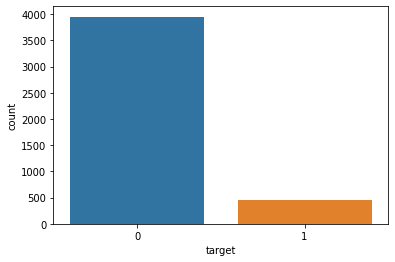

In [26]:
sns.countplot(task['target'])

In [27]:
task.target.value_counts()

0    3952
1     455
Name: target, dtype: int64

### We can see that there is target imbalance issue. so we have to match the numbers 

In [28]:
from sklearn.utils import resample
df_majority = task[task.target==0]
df_minority = task[task.target==1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=3952,    # to match majority class
                                 random_state=10) # reproducible results
 
# Combine majority class with upsampled minority class
final_task = pd.concat([df_majority, df_minority_upsampled])
final_task.target.value_counts()

1    3952
0    3952
Name: target, dtype: int64

Now the data in balanced. now lets check for the relations we have of other columns with target column

In [29]:
final_task.head()

,user_id,account_id,max_return_days,average_return_days,customer_since_months,total_revenue,average_revenue,avg_vas_count,avg_used_vas_value,business_type,avg_wallet_bonus,avg_active_ads,avg_new_ads,avg_email_replies,avg_call_replies,avg_sms_replies,target
0,410039,496,8,2,14,0,0,4,67,0,300,80,16,33,28,1,0
1,410240,499,37,9,10,0,0,5,114,0,0,233,19,17,14,0,0
2,411764,493,9,2,15,0,0,6,107,0,150,56,4,21,25,0,0
4,412071,496,1,1,18,0,0,6,110,0,42,49,2,18,26,1,0
5,412391,113,1,1,14,0,0,13,381,0,350,800,116,167,161,1,0


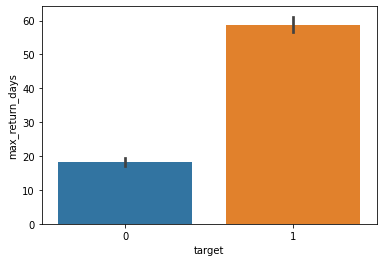

In [30]:
sns.barplot(data=final_task, x='target', y='max_return_days')

From above graph we can see that customer left when the **max return days** are above 20

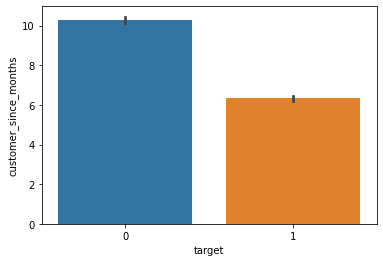

In [31]:
sns.barplot(data=final_task, x='target', y='customer_since_months')

The customer stays as the **customer_since_months** increases

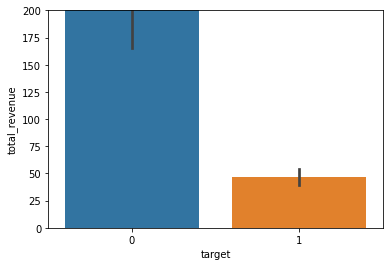

In [32]:
fig, ax = plt.subplots()
ax.set_ylim(0,200)
sns.barplot(data=final_task, x='target', y='total_revenue')

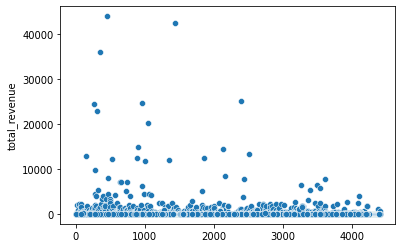

In [33]:
sns.scatterplot(data=final_task['total_revenue'])

We can see that almost whole dataset has given less revenue upto 4200 while just very small amount of people have contributed towards total revenue, we can count those outsiders as outliers and lets see if we could manage it

(array([7.867e+03, 1.900e+01, 7.000e+00, 3.000e+00, 1.000e+00, 4.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 2.000e+00]),
 array([    0. ,  4395.8,  8791.6, 13187.4, 17583.2, 21979. , 26374.8,
        30770.6, 35166.4, 39562.2, 43958. ]),
 <a list of 10 Patch objects>)

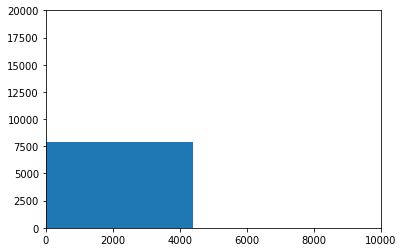

In [34]:
plt.xlim(0, 10000)
plt.ylim(0, 20000)
plt.hist(final_task['total_revenue'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


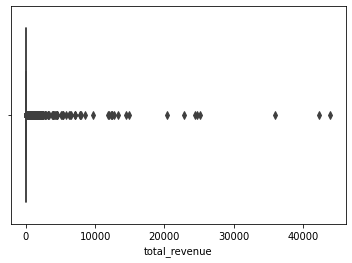

In [35]:
fig, ax = plt.subplots()
sns.boxplot(final_task['total_revenue'])

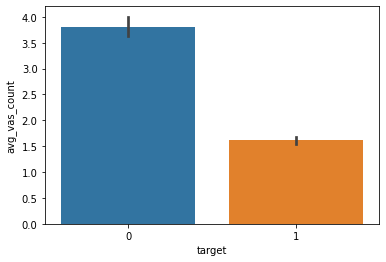

In [36]:
sns.barplot(data=final_task, x='target', y='avg_vas_count')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


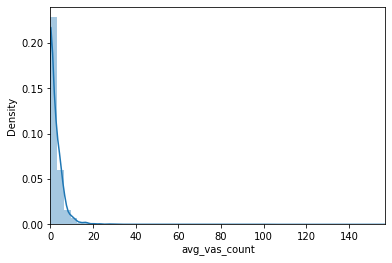

In [37]:
fig, ax = plt.subplots()
ax.set_xlim(0, 157)
sns.distplot(final_task['avg_vas_count'])

In [38]:
final_task.groupby(['avg_vas_count']).count()


,user_id,account_id,max_return_days,average_return_days,customer_since_months,total_revenue,average_revenue,avg_used_vas_value,business_type,avg_wallet_bonus,avg_active_ads,avg_new_ads,avg_email_replies,avg_call_replies,avg_sms_replies,target
avg_vas_count,,,,,,,,,,,,,,,,
0,2503,2503,2503,2503,2503,2503,2503,2503,2503,2503,2503,2503,2503,2503,2503,2503
1,1313,1313,1313,1313,1313,1313,1313,1313,1313,1313,1313,1313,1313,1313,1313,1313
2,1101,1101,1101,1101,1101,1101,1101,1101,1101,1101,1101,1101,1101,1101,1101,1101
3,754,754,754,754,754,754,754,754,754,754,754,754,754,754,754,754
4,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679
5,494,494,494,494,494,494,494,494,494,494,494,494,494,494,494,494
6,326,326,326,326,326,326,326,326,326,326,326,326,326,326,326,326
7,211,211,211,211,211,211,211,211,211,211,211,211,211,211,211,211
8,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109


In [39]:
25,30,31,33,37,38,57,63,65,89,103,157 == 1
26,35,44,47,55 == 2

(26, 35, 44, 47, False)

In [40]:
final_task.replace({'avg_vas_count': {25:'001',30:'001',31:'001',33:'001',37:'001',38:'001',54:'001',57:'001',63:'001',65:'001',89:'001',103:'001',
                                      157:'001',26:'001',35:'001',44:'001',47:'001',55:'001',15:'001',19:'001',20:'001',21:'001',22:'001',23:'001',
                                      27:'001',28:'001',29:'001',24:'001'}}, inplace=True)

In [41]:
final_task.groupby(['avg_vas_count']).count()

,user_id,account_id,max_return_days,average_return_days,customer_since_months,total_revenue,average_revenue,avg_used_vas_value,business_type,avg_wallet_bonus,avg_active_ads,avg_new_ads,avg_email_replies,avg_call_replies,avg_sms_replies,target
avg_vas_count,,,,,,,,,,,,,,,,
0,2503,2503,2503,2503,2503,2503,2503,2503,2503,2503,2503,2503,2503,2503,2503,2503
1,1313,1313,1313,1313,1313,1313,1313,1313,1313,1313,1313,1313,1313,1313,1313,1313
2,1101,1101,1101,1101,1101,1101,1101,1101,1101,1101,1101,1101,1101,1101,1101,1101
3,754,754,754,754,754,754,754,754,754,754,754,754,754,754,754,754
4,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679
5,494,494,494,494,494,494,494,494,494,494,494,494,494,494,494,494
6,326,326,326,326,326,326,326,326,326,326,326,326,326,326,326,326
7,211,211,211,211,211,211,211,211,211,211,211,211,211,211,211,211
8,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109


What we did in above code is we merged all the vas counts which were less in number upto 10 in one group for better visibility and interpretation.

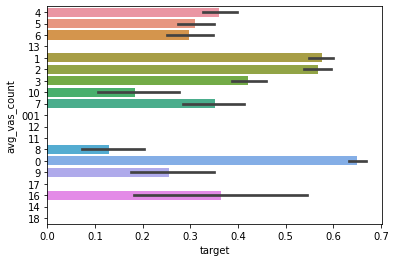

In [42]:
fig, ax = plt.subplots()
ax.set_ylim(0,200)
sns.barplot(data=final_task, x='target', y='avg_vas_count')

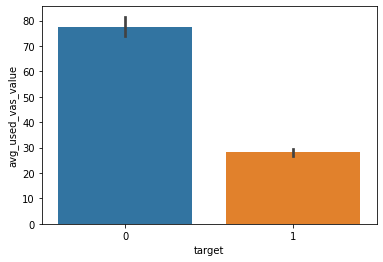

In [43]:
sns.barplot(data=final_task, x='target', y='avg_used_vas_value')

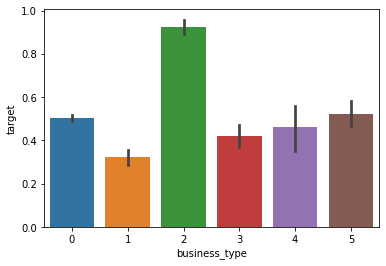

In [44]:
sns.barplot(data=final_task, x='business_type', y='target')

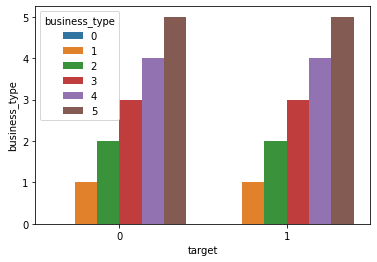

In [45]:
sns.barplot(data=final_task, x='target', y='business_type', hue='business_type')

In [46]:
final_task.columns

Index(['user_id', 'account_id', 'max_return_days', 'average_return_days',
       'customer_since_months', 'total_revenue', 'average_revenue',
       'avg_vas_count', 'avg_used_vas_value', 'business_type',
       'avg_wallet_bonus', 'avg_active_ads', 'avg_new_ads',
       'avg_email_replies', 'avg_call_replies', 'avg_sms_replies', 'target'],
      dtype='object')

In [47]:
final_task.head()

,user_id,account_id,max_return_days,average_return_days,customer_since_months,total_revenue,average_revenue,avg_vas_count,avg_used_vas_value,business_type,avg_wallet_bonus,avg_active_ads,avg_new_ads,avg_email_replies,avg_call_replies,avg_sms_replies,target
0,410039,496,8,2,14,0,0,4,67,0,300,80,16,33,28,1,0
1,410240,499,37,9,10,0,0,5,114,0,0,233,19,17,14,0,0
2,411764,493,9,2,15,0,0,6,107,0,150,56,4,21,25,0,0
4,412071,496,1,1,18,0,0,6,110,0,42,49,2,18,26,1,0
5,412391,113,1,1,14,0,0,13,381,0,350,800,116,167,161,1,0


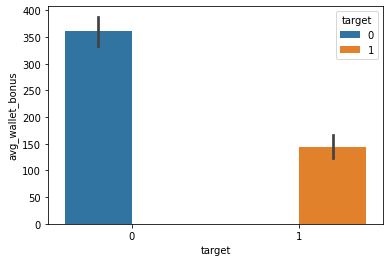

In [48]:
sns.barplot(data=final_task, x='target', y='avg_wallet_bonus', hue='target')

No. of stayed customers have avg wallet bonus higher

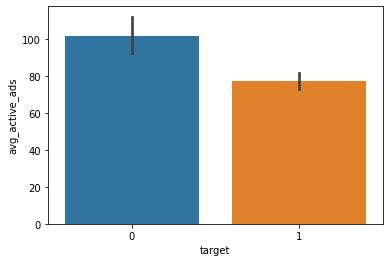

In [49]:

sns.barplot(data=final_task, x='target', y='avg_active_ads')

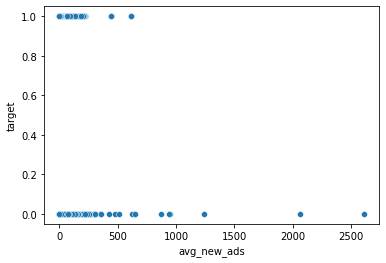

In [50]:
sns.scatterplot(x='avg_new_ads',y = 'target',data=final_task)

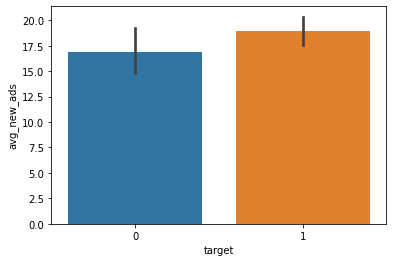

In [51]:
sns.barplot(data=final_task, x='target', y='avg_new_ads')

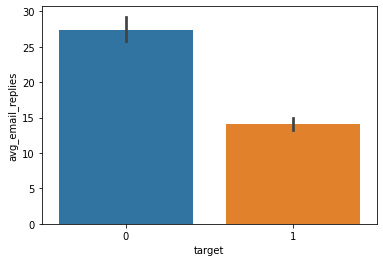

In [52]:

sns.barplot(data=final_task, x='target', y='avg_email_replies')

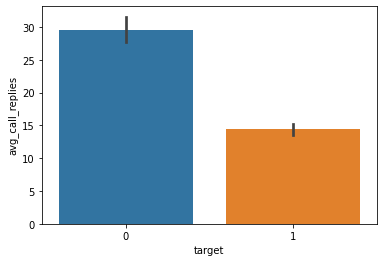

In [53]:

sns.barplot(data=final_task, x='target', y='avg_call_replies')

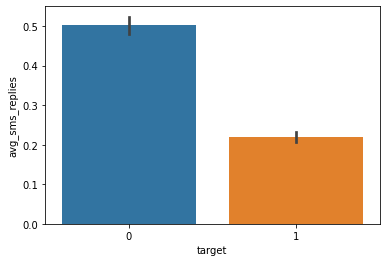

In [54]:

sns.barplot(data=final_task, x='target', y='avg_sms_replies')

postitive relation with '0'(stayed) target

1. customer_since_months
2. Total Revenue
3. avg_vas_count
4. avg_used_vas_value
5. avg_wallet_bonus
6. avg_active_ads
7. avg_email_replies
8. avg_sms_replies
9. avg_email_replies
10. avg_call_replies
11. avg revenue

Positive relation with '1' (left) target
1. max_return_days
2. avg_new_ads
3. average return days

In [55]:
final_task.shape

(7904, 17)

In [56]:
final_task.columns

Index(['user_id', 'account_id', 'max_return_days', 'average_return_days',
       'customer_since_months', 'total_revenue', 'average_revenue',
       'avg_vas_count', 'avg_used_vas_value', 'business_type',
       'avg_wallet_bonus', 'avg_active_ads', 'avg_new_ads',
       'avg_email_replies', 'avg_call_replies', 'avg_sms_replies', 'target'],
      dtype='object')

### Creating heatmap with the correlation matrix 

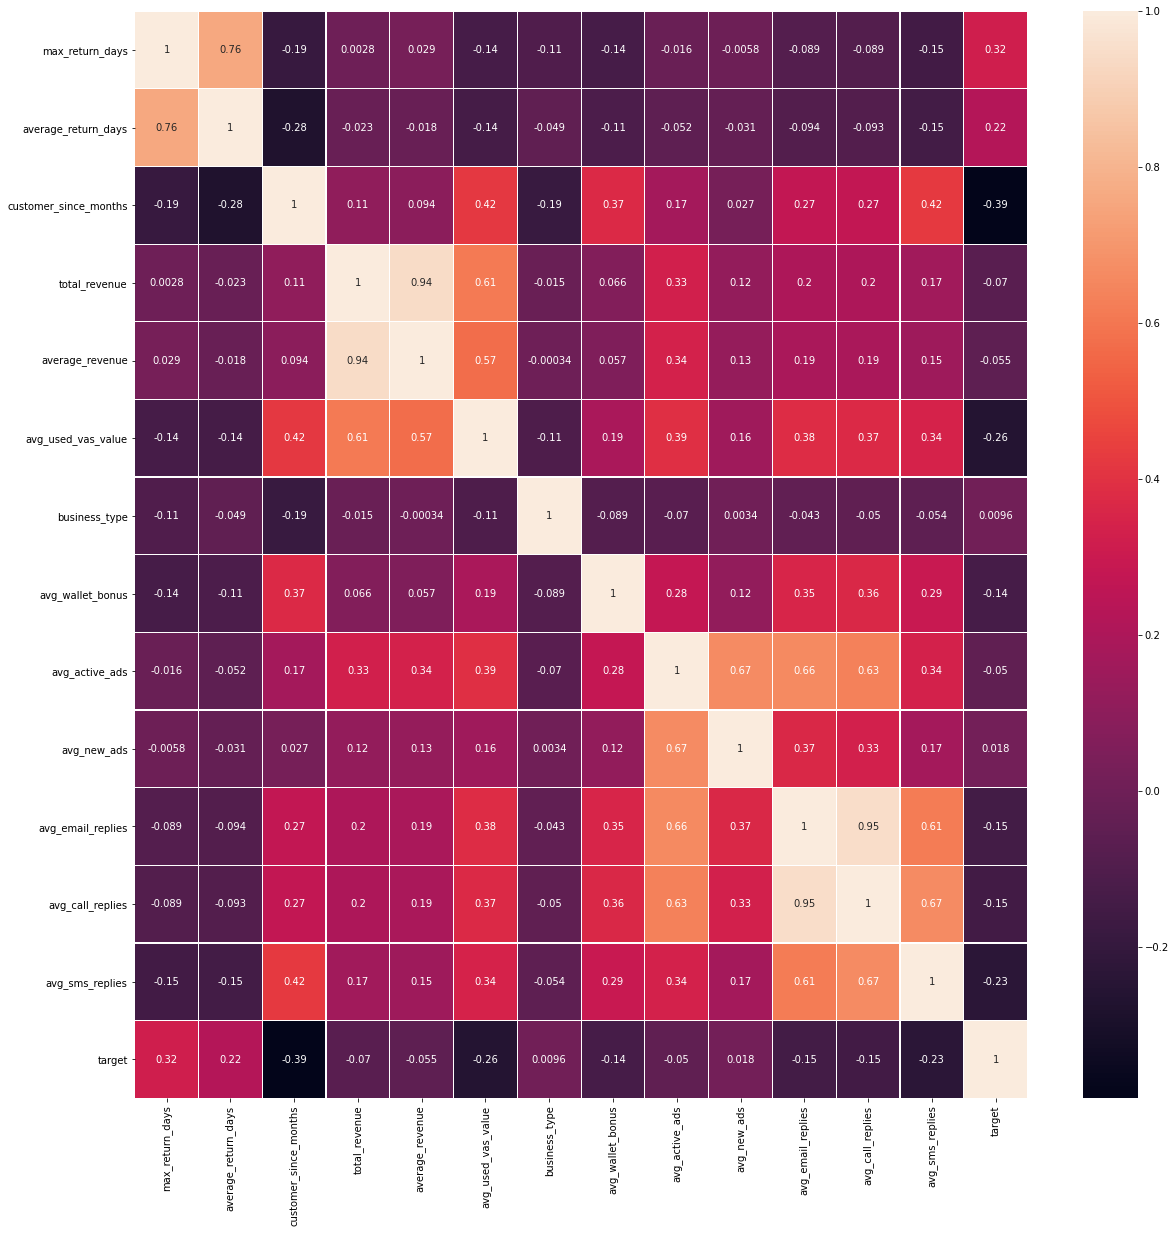

In [57]:
corr = final_task.drop(['user_id','account_id'], axis=1).corr()
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(corr, annot=True, linewidths=0.1)

1. Max return days and avg return days are highly correlated with each other and also to target at a considerable extent, This might help us in which column we can drop.

2. Total revenue and avg used vas value are also correlated to each other with a good extent.

3. Avg revenue and avg used vas value are correlated with each other.

4. Avg active ads are correlated with sms,emails and calls but less with target value.

5. New ads are correlated with active ads.

6. Email with calls and sms

7. Calls with sms

In [58]:
final_task.head(20)

,user_id,account_id,max_return_days,average_return_days,customer_since_months,total_revenue,average_revenue,avg_vas_count,avg_used_vas_value,business_type,avg_wallet_bonus,avg_active_ads,avg_new_ads,avg_email_replies,avg_call_replies,avg_sms_replies,target
0,410039,496,8,2,14,0,0,4,67,0,300,80,16,33,28,1,0
1,410240,499,37,9,10,0,0,5,114,0,0,233,19,17,14,0,0
2,411764,493,9,2,15,0,0,6,107,0,150,56,4,21,25,0,0
4,412071,496,1,1,18,0,0,6,110,0,42,49,2,18,26,1,0
5,412391,113,1,1,14,0,0,13,381,0,350,800,116,167,161,1,0
6,412662,1005,21,5,11,0,0,1,27,0,0,120,13,46,58,1,0
7,457000,262,29,4,16,0,0,4,69,3,64,27,4,19,18,1,0
10,498775,499,2,2,13,0,0,4,78,0,740,434,47,63,93,1,0
11,4100278,262,49,18,8,0,0,2,22,0,0,412,25,13,16,0,0
12,4100467,496,25,3,13,0,0,3,56,0,230,63,2,29,28,0,0


## Logistic Regression

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [97]:
X = final_task.drop(['target'], axis=1)
y = final_task['target']


In [98]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state = 20)

In [99]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5928, 16)
(1976, 16)
(5928,)
(1976,)


In [70]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
predict = lr.predict(X_test)

In [71]:
accuracy_score(y_test,predict)

0.5040485829959515

In [72]:
confusion_matrix(y_test, predict)

array([[  0, 980],
       [  0, 996]])

In [73]:
f1_score(y_test, predict)

0.6702557200538358

In [74]:
df = final_task.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7904 entries, 0 to 2859
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   user_id                7904 non-null   int64 
 1   account_id             7904 non-null   int64 
 2   max_return_days        7904 non-null   int64 
 3   average_return_days    7904 non-null   int64 
 4   customer_since_months  7904 non-null   int64 
 5   total_revenue          7904 non-null   int64 
 6   average_revenue        7904 non-null   int64 
 7   avg_vas_count          7904 non-null   object
 8   avg_used_vas_value     7904 non-null   int64 
 9   business_type          7904 non-null   int64 
 10  avg_wallet_bonus       7904 non-null   int64 
 11  avg_active_ads         7904 non-null   int64 
 12  avg_new_ads            7904 non-null   int64 
 13  avg_email_replies      7904 non-null   int64 
 14  avg_call_replies       7904 non-null   int64 
 15  avg_sms_replies      

In [75]:
x = df.drop(['target'], axis=1)
Y = df['target']

## Scaling data and creating copy 

In [76]:
sc = StandardScaler()
scaled_data = sc.fit_transform(x)


In [77]:

x_train, x_test, Y_train, Y_test = train_test_split(scaled_data,Y, test_size=0.25, random_state = 20)

lr = LogisticRegression()
lr.fit(x_train, Y_train)
predict1 = lr.predict(x_test)

print(accuracy_score(Y_test,predict1))

0.7353238866396761


In [78]:
f1_score(y_test, predict1)

0.7541137752703339

In [79]:
confusion_matrix(y_test, predict1)

array([[651, 329],
       [194, 802]])

### Creating new data with PCA for dimentionality reduction.

In [80]:
pca = PCA()
pca_scaled = pca.fit_transform(X)

In [81]:
X_train, X_test, y_train, y_test = train_test_split(pca_scaled,y, test_size=0.25, random_state = 20)


In [82]:
X_train

array([[-4.41982078e+09, -1.81986697e+02, -2.92893672e+02, ...,
        -4.41730185e-02, -6.58371137e-01,  9.42966603e-02],
       [ 2.85094249e+09, -9.07523785e+01,  2.05614405e+02, ...,
        -5.01242629e-01, -5.29656379e-01,  3.63978592e-01],
       [ 2.81967907e+09, -1.49933878e+02, -2.32696596e+02, ...,
        -2.10672174e-01, -2.66809991e-01,  1.64867684e-01],
       ...,
       [-4.43263539e+09, -1.81973944e+02, -1.75973445e+02, ...,
        -1.17295762e+00, -8.02036033e-02,  3.04581339e-01],
       [ 2.71844891e+09, -9.18983669e+01,  1.21501177e+02, ...,
         2.67624155e-01, -2.67436972e-01,  7.11023352e-01],
       [-4.43374716e+09, -1.68292941e+02, -9.91985973e+01, ...,
        -4.05439957e-01, -2.07915936e-01, -1.85776517e-01]])

In [83]:
lr.fit(x_train, Y_train)
pca_predict = lr.predict(x_test)

print(accuracy_score(Y_test,pca_predict))
print(f1_score(y_test, pca_predict))

0.7353238866396761
0.7541137752703339


In [84]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import ExtraTreeClassifier
from xgboost import XGBClassifier

### Decision Tree Classifier

In [85]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dtpred = dt.predict(X_test)
print(accuracy_score(y_test, dtpred))
print(f1_score(y_test, dtpred))

0.9544534412955465
0.9567307692307692


In [86]:
confusion_matrix(y_test, dtpred)

array([[891,  89],
       [  1, 995]])

In [87]:
from sklearn.metrics import precision_score

In [88]:
precision_score(y_test, dtpred)

0.9178966789667896

### Random Forest

In [101]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rfpred = rf.predict(X_test)
print(accuracy_score(y_test, rfpred))
print(f1_score(y_test, rfpred))

0.9817813765182186
0.9822485207100593


In [102]:
confusion_matrix(y_test, rfpred)

array([[944,  36],
       [  0, 996]])

In [91]:
X_train, X_test, y_train, y_test = train_test_split(scaled_data,y, test_size=0.25, random_state = 20)
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xpred = xgb.predict(X_test)
print(accuracy_score(y_test, xpred))
print(f1_score(y_test, xpred))

0.832995951417004
0.8388671875


### K-nearest Neighbor

In [92]:
from sklearn.neighbors import KNeighborsClassifier

In [93]:

knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
kpred = knn.predict(X_test)
print(accuracy_score(y_test, kpred))
print(f1_score(y_test, kpred))

0.9564777327935222
0.958252427184466


### SVM

In [94]:
from sklearn.svm import SVC
svc = SVC()
X_train, X_test, y_train, y_test = train_test_split(scaled_data,y, test_size=0.25, random_state = 20)

svc = svc.fit(X_train, y_train)
svcpred = svc.predict(X_test)
print(accuracy_score(y_test, svcpred))
print(f1_score(y_test, svcpred))

0.7692307692307693
0.7840909090909092


In [95]:
from sklearn.metrics import classification_report

print(classification_report(y_test, dtpred))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95       980
           1       0.92      1.00      0.96       996

    accuracy                           0.95      1976
   macro avg       0.96      0.95      0.95      1976
weighted avg       0.96      0.95      0.95      1976



In [96]:
from sklearn.model_selection import GridSearchCV

### Put grid search cv on random forest.but the accuracy lowered instead of increasing. so, did not run again since because of hardware incapabilities.

In [ ]:
'''# tree_param = {'criterion': ['gini','entropy'],
              'max_depth': [3,4,6,7,8,10,15,20,50,100],
              'min_samples_split':[2,3,4,5,6],
              'min_samples_leaf': [2,3,4,5,6],
              'max_features': ['auto','sqrt','log2'],
              'max_leaf_nodes': [2,3,4,5,6,7,8]
              }'''

In [ ]:
#clf = GridSearchCV(DecisionTreeClassifier(), tree_param, cv=10, n_jobs=-1)

In [ ]:
#clf.fit(X_train, y_train)

In [ ]:
#clf.fit(X_train, y_train)

In [ ]:
#gpred = clf.predict(X_test)
#print(classification_report(y_test, gpred))

# We have received best accuracy with 98.17 % and f1 score of 98.22